# Covid-19 competition


## Introduction

### Why am I doing this competition ?

In this period of containment against **Coronavirus (Covid-19)**, I am doing this competition to better understand this pandemic and also to make something more interesting of my week-end than watching Netflix.

## Data analysis

To understand data I will first turn them into pandas dataframe and make some data visualisations.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
# file names
trainingFile = "./data/train.csv"
testFile = "./data/test.csv"
submissionFile = "./data/submission.csv"

# column names for each file
columnsTrainingFile = ["Id","Province_State","Country_Region","Date","ConfirmedCases","Fatalities"]
columnsTestFile = ["ForecastId","Province_State","Country_Region","Date"]
columnsSubmissionFile = ["ForecastId","ConfirmedCases","Fatalities"]

In [3]:
# creation of the dataframes
trainingData = pd.read_csv(trainingFile,delimiter=",")
testData = pd.read_csv(testFile,delimiter=",")
submissionData = pd.read_csv(submissionFile,delimiter=",")

print("The dataframes are built !")


The dataframes are built !


In [4]:
print("Training data : \n",trainingData[:50])

Training data : 
     Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0    1            NaN    Afghanistan  2020-01-22             0.0         0.0
1    2            NaN    Afghanistan  2020-01-23             0.0         0.0
2    3            NaN    Afghanistan  2020-01-24             0.0         0.0
3    4            NaN    Afghanistan  2020-01-25             0.0         0.0
4    5            NaN    Afghanistan  2020-01-26             0.0         0.0
5    6            NaN    Afghanistan  2020-01-27             0.0         0.0
6    7            NaN    Afghanistan  2020-01-28             0.0         0.0
7    8            NaN    Afghanistan  2020-01-29             0.0         0.0
8    9            NaN    Afghanistan  2020-01-30             0.0         0.0
9   10            NaN    Afghanistan  2020-01-31             0.0         0.0
10  11            NaN    Afghanistan  2020-02-01             0.0         0.0
11  12            NaN    Afghanistan  2020-02-02          

In [5]:
type(trainingData["Province_State"][0])

float

In [6]:
def provinceStateConvert(province_state):
    if type(province_state) == str:
        return province_state
    else:
        return "-"

In [7]:
# Building of the infected countries and states dict and list
countryAndState = {}

for i in range(trainingData.shape[0]):
    if trainingData["Country_Region"][i] not in countryAndState.keys():
        countryAndState[trainingData["Country_Region"][i]] = []
    if provinceStateConvert(trainingData["Province_State"][i]) not in countryAndState[trainingData["Country_Region"][i]]:
        countryAndState[trainingData["Country_Region"][i]].append(provinceStateConvert(trainingData["Province_State"][i]))

print("countryAndState : ",countryAndState)

countryAndState :  {'Afghanistan': ['-'], 'Albania': ['-'], 'Algeria': ['-'], 'Andorra': ['-'], 'Angola': ['-'], 'Antigua and Barbuda': ['-'], 'Argentina': ['-'], 'Armenia': ['-'], 'Australia': ['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia'], 'Austria': ['-'], 'Azerbaijan': ['-'], 'Bahamas': ['-'], 'Bahrain': ['-'], 'Bangladesh': ['-'], 'Barbados': ['-'], 'Belarus': ['-'], 'Belgium': ['-'], 'Belize': ['-'], 'Benin': ['-'], 'Bhutan': ['-'], 'Bolivia': ['-'], 'Bosnia and Herzegovina': ['-'], 'Brazil': ['-'], 'Brunei': ['-'], 'Bulgaria': ['-'], 'Burkina Faso': ['-'], 'Cabo Verde': ['-'], 'Cambodia': ['-'], 'Cameroon': ['-'], 'Canada': ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan'], 'Central African Republic': ['-'], 'Chad': ['-'], 'Chile': ['-'], 'China': ['Anhui', 'Bei

In [8]:
# list of countries
listCountries = list(countryAndState.keys())

print("List of countries : ",listCountries)

List of countries :  ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', '

In [9]:
print(list(countryAndState.values()))

[['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan'], ['-'], ['-'], ['-'], ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['Faroe Islands', 'Greenland', '-

In [10]:
# Building of the date list
listDate = []
for i in range(trainingData.shape[0]):
    if trainingData["Date"][i] not in listDate:
        listDate.append(trainingData["Date"][i])

print("listDate : ",listDate)
    

listDate :  ['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27']


In [11]:
"""
Creation of a dictionnary with this data structure : 

trainingDataDict = {
    country1 = {
        "ConfirmedCases":{
            date1=number1,
            date2=number2,
            .......
        },
        "Fatalities":{
            date1=number1,
            date2=number2,
            .......
        }
    },
    country2 = {
        "state1":{
            "ConfirmedCases":{
            date1=number1,
            date2=number2,
            .......
            },
            "Fatalities":{
                date1=number1,
                date2=number2,
                .......
            }
        },
        "state2":{},
        "state3":{},
        .....
    },
    ....
    }
"""


# trainingDataDict = {country:{"ConfirmedCases":{date:0 for date in listDate},"Fatalities":{date:0 for date in listDate}} for country in listCountries}

trainingDataDict = {}
for country in listCountries:
    trainingDataDict[country] = {state : {"ConfirmedCases":{date:0 for date in listDate},"Fatalities":{date:0 for date in listDate}} for state in countryAndState[country]}


# filling of the dictionnary with data
# for countries with several states or provinces, the number of cases are added 
for i in range(trainingData.shape[0]):
        trainingDataDict[trainingData["Country_Region"][i]][provinceStateConvert(trainingData["Province_State"][i])]["ConfirmedCases"][trainingData["Date"][i]]+=trainingData["ConfirmedCases"][i]
        trainingDataDict[trainingData["Country_Region"][i]][provinceStateConvert(trainingData["Province_State"][i])]["Fatalities"][trainingData["Date"][i]]+=trainingData["Fatalities"][i] 
      



print("trainingDataDict France Confirmed Cases : \n",trainingDataDict["France"]["-"]["ConfirmedCases"])


trainingDataDict France Confirmed Cases : 
 {'2020-01-22': 0.0, '2020-01-23': 0.0, '2020-01-24': 2.0, '2020-01-25': 3.0, '2020-01-26': 3.0, '2020-01-27': 3.0, '2020-01-28': 4.0, '2020-01-29': 5.0, '2020-01-30': 5.0, '2020-01-31': 5.0, '2020-02-01': 6.0, '2020-02-02': 6.0, '2020-02-03': 6.0, '2020-02-04': 6.0, '2020-02-05': 6.0, '2020-02-06': 6.0, '2020-02-07': 6.0, '2020-02-08': 11.0, '2020-02-09': 11.0, '2020-02-10': 11.0, '2020-02-11': 11.0, '2020-02-12': 11.0, '2020-02-13': 11.0, '2020-02-14': 11.0, '2020-02-15': 12.0, '2020-02-16': 12.0, '2020-02-17': 12.0, '2020-02-18': 12.0, '2020-02-19': 12.0, '2020-02-20': 12.0, '2020-02-21': 12.0, '2020-02-22': 12.0, '2020-02-23': 12.0, '2020-02-24': 12.0, '2020-02-25': 14.0, '2020-02-26': 18.0, '2020-02-27': 38.0, '2020-02-28': 57.0, '2020-02-29': 100.0, '2020-03-01': 130.0, '2020-03-02': 191.0, '2020-03-03': 204.0, '2020-03-04': 285.0, '2020-03-05': 377.0, '2020-03-06': 653.0, '2020-03-07': 949.0, '2020-03-08': 1126.0, '2020-03-09': 1209.0, 

In [12]:
def listValuesPerPlaces(type,country,states=["-"],listDate=listDate,dataDict=trainingDataDict):
    """
    type : ConfirmedCases ou Fatalities
    """
    if len(states) > 0:
        listValues = [sum([dataDict[country][state][type][date] for state in states]) for date in listDate]
    else:
        listValues = [dataDict[country][states[0]][type][date] for date in listDate]
    return listValues

## Some visulisations to better understand what is inside data

In [13]:
# use of matplotlib library to create some basic visualisations
import matplotlib.pyplot as plt

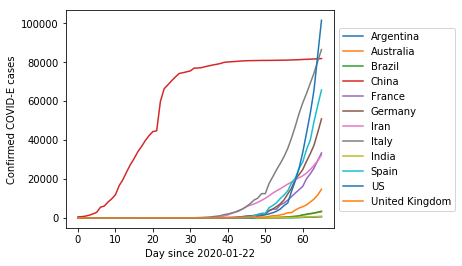

In [14]:
# list of the countries to display on the visualisations
countriesDisplayed =  ['Argentina', 
    'Australia', 
    'Brazil',
    'China',
    'France',  
    'Germany',  
    'Iran',
    'Italy',
    'India',
    'Spain',
    'US', 
    'United Kingdom']

casesEvolution = plt.figure()
casesEvolutionGraph = plt.subplot(111)

for country in countriesDisplayed:
    plt.plot([k for k in range(len(listDate))],listValuesPerPlaces("ConfirmedCases",country,countryAndState[country]))


box = casesEvolutionGraph.get_position()
casesEvolutionGraph.set_position([box.x0, box.y0, box.width * 0.8, box.height])


plt.xlabel("Day since "+listDate[0])
plt.ylabel("Confirmed COVID-E cases")
casesEvolutionGraph.legend(countriesDisplayed,loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


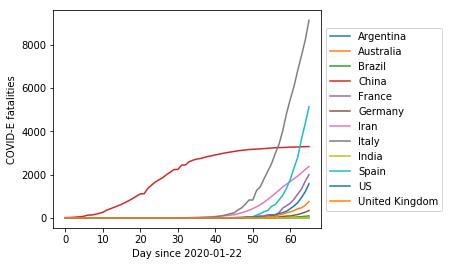

In [15]:
fatalitiesEvolution =plt.figure()

fatalitiesEvolutionGraph = plt.subplot(111)

for country in countriesDisplayed:
    plt.plot([k for k in range(len(listDate))],listValuesPerPlaces("Fatalities",country,countryAndState[country]))
    


box = fatalitiesEvolutionGraph.get_position()
fatalitiesEvolutionGraph.set_position([box.x0, box.y0, box.width * 0.8, box.height])



plt.xlabel("Day since "+listDate[0])
plt.ylabel("COVID-E fatalities")
fatalitiesEvolutionGraph.legend(countriesDisplayed,loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [16]:
import plotly.graph_objects as go

fig = go.Figure()

for country in countriesDisplayed:
    fig.add_trace(go.Scatter(
        x=listDate, 
        y=listValuesPerPlaces("ConfirmedCases",country,countryAndState[country]),
        name=country,
         hovertemplate =
         '<b>Country<b>: %{text}'+
         '<br><i>Date</i>: %{x}'+
         '<br><b>Confirmed cases</b>: %{y}<br>',
        text=[country for elt in listDate],
        line_shape='linear'))

fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(title='Covid-19 - Confirmed cases evolution',legend=dict(y=0.5, traceorder='reversed', font_size=16))

fig.show()

In [17]:
fig = go.Figure()

for country in countriesDisplayed:
    fig.add_trace(go.Scatter(
        x=listDate, 
        y=listValuesPerPlaces("Fatalities",country,countryAndState[country]),
        name=country,
         hovertemplate =
         '<b>Country<b>: %{text}'+
         '<br><i>Date</i>: %{x}'+
         '<br><b>Fatalities</b>: %{y}<br>',
        text=[country for elt in listDate],
        line_shape='linear'))

fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(title='Covid-19 - Fatalities evolution',legend=dict(y=0.5, traceorder='reversed', font_size=16))

fig.show()

In [18]:
country = "Italy"

fig = go.Figure(data=[
    go.Bar(name='Confirmed cases', 
        x=listDate, 
        y=listValuesPerPlaces("ConfirmedCases",country,countryAndState[country])),
    go.Bar(name='Fatalities', 
        x=listDate, 
        y=listValuesPerPlaces("Fatalities",country,countryAndState[country]))
])

# Change the bar mode
fig.update_layout(title=country+' - Covid-19 Evolution',barmode='group')
fig.show()

In [19]:
# Initialize figure
fig = go.Figure()

initialCountry = "Italy"

countriesTraces = []

# Add Traces
for country in countriesDisplayed:
    if country != initialCountry:
        isVisible = False
    else :
        isVisible = True
    fig.add_trace(
        go.Bar(name='Confirmed cases', 
            x=listDate, 
            y=listValuesPerPlaces("ConfirmedCases",country,countryAndState[country]),
            visible=isVisible)
    )
    fig.add_trace(
        go.Bar(name='Fatalities', 
            x=listDate, 
            y=listValuesPerPlaces("Fatalities",country,countryAndState[country]),
            visible=isVisible)
        )

    countriesTraces += [country,country]

buttonsList = [dict(label=country,method="update",args=[{"visible": [countryAll == country for countryAll in countriesTraces]},{"title": country+' - Covid-19 Evolution'}]) for country in countriesDisplayed]


fig.update_layout(
    updatemenus=[
        dict(
            direction="down",
            active=countriesDisplayed.index(initialCountry),
            x=1,
            y=1.2,
            buttons=buttonsList
        )
    ],
    title=initialCountry+' - Covid-19 Evolution',
    barmode='group')



fig.show()

Conclusion and remarks on the visualisations below.


Now that we did some visualisations, it is time to use some machine learning algorithms, and try to predict the evolution of the outbreak in the next few days.

I will implement several algorithms and methods to predict the outbreak evolution. 

## Support Vector Machines



In [20]:
# import of scikit-learn svm algorithm
from sklearn import svm

X = np.array([k for k in range(len(listDate))]).reshape(-1, 1)
y = listValuesPerPlaces("ConfirmedCases",country,countryAndState[country])

clf = svm.SVR()
clf.fit(X, y)
print("Score : ",clf.score(X,y))

XtoPredict = np.array([k for k in range(len(listDate),len(listDate)+10)]).reshape(-1,1)
print(XtoPredict)
clf.predict(XtoPredict)

Score :  -0.17184167008209417
[[66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]]


array([11.38644212, 11.01856268, 11.00024704, 11.00012363, 11.00012352,
       11.00012352, 11.00012352, 11.00012352, 11.00012352, 11.00012352])

In [21]:
from sklearn.svm import SVR

clfSVR = SVR(C=1.0, epsilon=0.2)
clfSVR.fit(X, y)
print("Score : ",clfSVR.score(X,y))
clfSVR.predict(XtoPredict)

Score :  -0.17184167008209417


array([11.38644212, 11.01856268, 11.00024704, 11.00012363, 11.00012352,
       11.00012352, 11.00012352, 11.00012352, 11.00012352, 11.00012352])

# Linear Regression

Score :  0.384306622237762
Coefficient :  [95.00467592]
Intercept y axis :  -1864.6974219810031
Prediction :  [4405.61118881 4500.61586473 4595.62054065 4690.62521657 4785.6298925
 4880.63456842 4975.63924434 5070.64392026 5165.64859618 5260.6532721 ]


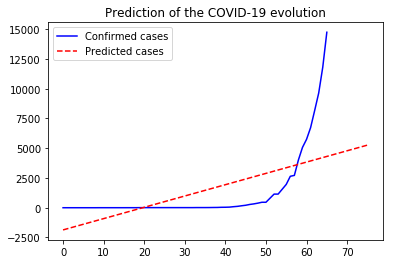

In [22]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression().fit(X, y)
print("Score : ",linearReg.score(X, y))

print("Coefficient : ",linearReg.coef_)

print("Intercept y axis : ",linearReg.intercept_)

print("Prediction : ",linearReg.predict(XtoPredict))

plt.figure()
plt.plot(list(X),list(y),"b")
plt.plot([k for k in range(len(listDate)+len(XtoPredict))],list(linearReg.predict(np.array([k for k in range(len(listDate)+len(XtoPredict))]).reshape(-1,1))),"--r")
plt.title("Prediction of the COVID-19 evolution")
plt.legend(["Confirmed cases","Predicted cases"])
plt.show()


## Result

Clearly, the **Linear Regression** is not a good model to fit our data. We need to look into a more complex model. Let's try with a **Polynomial Regression**.

Degree :  1  - Root mean square :  79513  - Linear distance :  1617
Degree :  2  - Root mean square :  35226  - Linear distance :  1133
Degree :  3  - Root mean square :  11064  - Linear distance :  663
Degree :  4  - Root mean square :  2499  - Linear distance :  319
Degree :  5  - Root mean square :  527  - Linear distance :  135
Degree :  6  - Root mean square :  229  - Linear distance :  71
Degree :  7  - Root mean square :  193  - Linear distance :  55
Degree :  8  - Root mean square :  182  - Linear distance :  57
Degree :  9  - Root mean square :  164  - Linear distance :  60
Degree :  10  - Root mean square :  135  - Linear distance :  57
Degree :  11  - Root mean square :  108  - Linear distance :  45
Degree :  12  - Root mean square :  94  - Linear distance :  34
Degree :  13  - Root mean square :  90  - Linear distance :  29
Degree :  14  - Root mean square :  90  - Linear distance :  29
Degree :  15  - Root mean square :  90  - Linear distance :  29
Degree :  16  - Root mea

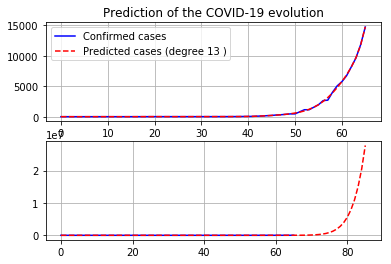

In [23]:
plt.figure()

degrees = [k for k in range(1,20)]
nbFollowingDays = 20
listDateDigit = [k for k in range(len(listDate))]

plt.subplot(2, 1, 1)
plt.plot(listDateDigit, y, "-b")
plt.grid(True)

best_poly_fit = 0
list_quadratic_distance = []
list_linear_distance = []
best_degree = 0
for degree in degrees:
    poly_fit = np.poly1d(np.polyfit(listDateDigit, y, degree))
    list_quadratic_distance.append(sum([(poly_fit(k)-y[k])**2 for k in range(len(listDateDigit))])/len(listDateDigit)**2)
    list_linear_distance.append(sum([abs(poly_fit(k)-y[k]) for k in range(len(listDateDigit))])/len(listDateDigit))
    print("Degree : ",degree," - Root mean square : ",int(list_quadratic_distance[-1])," - Linear distance : ",int(list_linear_distance[-1]))

list_quadratic_distance = [elt/max(list_quadratic_distance) for elt in list_quadratic_distance]
list_linear_distance = [elt/max(list_linear_distance) for elt in list_linear_distance] 

print("list_quadratic_distance : ",list_quadratic_distance)
print("list_linear_distance : ",list_linear_distance)

sum_distances = [list_quadratic_distance[k] + list_linear_distance[k] for k in range(len(list_linear_distance))]

print("sum_distances : ",sum_distances)

best_degree = np.argmin(sum_distances)


best_poly_fit =np.poly1d(np.polyfit(listDateDigit, y, degrees[best_degree]))


plt.plot(listDateDigit, best_poly_fit(listDateDigit), "--r")

print("Best degree : ",best_degree)

print("Minimal distance : ",list_quadratic_distance)

plt.title("Prediction of the COVID-19 evolution")
plt.legend(["Confirmed cases","Predicted cases (degree "+ str(best_degree)+ " )"])

plt.subplot(2, 1, 2)
plt.plot(listDateDigit, y, "-b")
plt.grid(True)


plt.plot([k for k in range(len(listDateDigit)+nbFollowingDays)], best_poly_fit(
    [k for k in range(len(listDateDigit) + nbFollowingDays)]),"--r")




plt.show()


This model is not the best one, as it increases without limit. In real life, the containment measure will affect the evolution of the disease and the number of confirmed cases will hopefully reach an extremum.

As we are now the first of April and the end of the competition is tonight, I will use this model to predict the number of cases in the following days, for every country.

To optimise the results and adapt them to each country, I will find the best polynomial regression for each country.

## Prediction of cases with polynomial regression

In [24]:
listDateToPredict = ["2020-03-19",
        "2020-03-20",
        "2020-03-21",
        "2020-03-22",
        "2020-03-23",
        "2020-03-24",
        "2020-03-25",
        "2020-03-26",
        "2020-03-27",
        "2020-03-28",
        "2020-03-29",
        "2020-03-30",
        "2020-03-31",
        "2020-04-01",
        "2020-04-02",
        "2020-04-03",
        "2020-04-04",
        "2020-04-05",
        "2020-04-06",
        "2020-04-07",
        "2020-04-08",
        "2020-04-09",
        "2020-04-10",
        "2020-04-11",
        "2020-04-12",
        "2020-04-13",
        "2020-04-14",
        "2020-04-15",
        "2020-04-16",
        "2020-04-17",
        "2020-04-18",
        "2020-04-19",
        "2020-04-20",
        "2020-04-21",
        "2020-04-22",
        "2020-04-23",
        "2020-04-24",
        "2020-04-25",
        "2020-04-26",
        "2020-04-27",
        "2020-04-28",
        "2020-04-29",
        "2020-04-30"]

In [25]:
degrees = [k for k in range(1,15)]
nbFollowingDays = 34
listDateDigit = [k for k in range(len(listDate))]

predictedNumberPerCountry = {}
for country in listCountries:
    predictedNumberPerCountry[country] = {state : {"ConfirmedCases":{date:0 for date in listDateToPredict},"Fatalities":{date:0 for date in listDateToPredict}} for state in countryAndState[country]}

for country in listCountries :
    for state in countryAndState[country]:

        # computing for confirmed cases
        
        confirmedCases = listValuesPerPlaces("ConfirmedCases",country,countryAndState[country])
        
        list_quadratic_distance = []
        list_linear_distance = []
        
        for degree in degrees:
            poly_fit = np.poly1d(np.polyfit(listDateDigit, y, degree))
            list_quadratic_distance.append(sum([(poly_fit(k)-y[k])**2 for k in range(len(listDateDigit))])/len(listDateDigit)**2)
            list_linear_distance.append(sum([abs(poly_fit(k)-y[k]) for k in range(len(listDateDigit))])/len(listDateDigit))

        list_quadratic_distance = [elt/max(list_quadratic_distance) for elt in list_quadratic_distance]
        list_linear_distance = [elt/max(list_linear_distance) for elt in list_linear_distance] 
        sum_distances = [list_quadratic_distance[k] + list_linear_distance[k] for k in range(len(list_linear_distance))]
        best_degree = np.argmin(sum_distances)
        best_poly_fit =np.poly1d(np.polyfit(listDateDigit, y, degrees[best_degree]))
        predictedNumberConfirmedCases = best_poly_fit([k for k in range(len(listDateDigit) + nbFollowingDays)])

        for i in range(len(listDateToPredict)):
            if listDateToPredict[i] in listDate:
                predictedNumberPerCountry[country][state]["ConfirmedCases"][listDateToPredict[i]] = trainingDataDict[country][state]["ConfirmedCases"][listDateToPredict[i]]
            else:
                predictedNumberPerCountry[country][state]["ConfirmedCases"][listDateToPredict[i]] = int(predictedNumberConfirmedCases[-(len(listDateToPredict)-i)])





        # computing for fatalities
        fatalities = listValuesPerPlaces("Fatalities",country,countryAndState[country])
        list_quadratic_distance = []
        list_linear_distance = []

        for degree in degrees:
            poly_fit = np.poly1d(np.polyfit(listDateDigit, y, degree))
            list_quadratic_distance.append(sum([(poly_fit(k)-y[k])**2 for k in range(len(listDateDigit))])/len(listDateDigit)**2)
            list_linear_distance.append(sum([abs(poly_fit(k)-y[k]) for k in range(len(listDateDigit))])/len(listDateDigit))

        list_quadratic_distance = [elt/max(list_quadratic_distance) for elt in list_quadratic_distance]
        list_linear_distance = [elt/max(list_linear_distance) for elt in list_linear_distance] 
        sum_distances = [list_quadratic_distance[k] + list_linear_distance[k] for k in range(len(list_linear_distance))]
        best_degree = np.argmin(sum_distances)
        best_poly_fit =np.poly1d(np.polyfit(listDateDigit, y, degrees[best_degree]))
        predictedNumberFatalities = best_poly_fit([k for k in range(len(listDateDigit) + nbFollowingDays)])

        for i in range(len(listDateToPredict)):
            if listDateToPredict[i] in listDate:
                predictedNumberPerCountry[country][state]["Fatalities"][listDateToPredict[i]] = trainingDataDict[country][state]["Fatalities"][listDateToPredict[i]]
            else:
                predictedNumberPerCountry[country][state]["Fatalities"][listDateToPredict[i]] = int(predictedNumberFatalities[-(len(listDateToPredict)-i)])

print("predictedNumberPerCountry : ",predictedNumberPerCountry)



20-04-30': 957719531}}, 'Gibraltar': {'ConfirmedCases': {'2020-03-19': 10.0, '2020-03-20': 10.0, '2020-03-21': 10.0, '2020-03-22': 15.0, '2020-03-23': 15.0, '2020-03-24': 15.0, '2020-03-25': 26.0, '2020-03-26': 35.0, '2020-03-27': 55.0, '2020-03-28': 19548, '2020-03-29': 27418, '2020-03-30': 40505, '2020-03-31': 62096, '2020-04-01': 97136, '2020-04-02': 152887, '2020-04-03': 239793, '2020-04-04': 372619, '2020-04-05': 571912, '2020-04-06': 865868, '2020-04-07': 1292703, '2020-04-08': 1903632, '2020-04-09': 2766582, '2020-04-10': 3970807, '2020-04-11': 5632559, '2020-04-12': 7902051, '2020-04-13': 10971926, '2020-04-14': 15087530, '2020-04-15': 20559302, '2020-04-16': 27777648, '2020-04-17': 37230728, '2020-04-18': 49525634, '2020-04-19': 65413508, '2020-04-20': 85819225, '2020-04-21': 111876354, '2020-04-22': 144968181, '2020-04-23': 186775711, '2020-04-24': 239333653, '2020-04-25': 305095528, '2020-04-26': 387009174, '2020-04-27': 488604071, '2020-04-28': 614092085, '2020-04-29': 7684

In [26]:
# ecriture du CSV
print(predictedNumberPerCountry["France"]["-"]["Fatalities"])
print(predictedNumberPerCountry["France"]["-"]["ConfirmedCases"])

{'2020-03-19': 243.0, '2020-03-20': 450.0, '2020-03-21': 562.0, '2020-03-22': 674.0, '2020-03-23': 860.0, '2020-03-24': 1100.0, '2020-03-25': 1331.0, '2020-03-26': 1696.0, '2020-03-27': 1995.0, '2020-03-28': 19548, '2020-03-29': 27418, '2020-03-30': 40505, '2020-03-31': 62096, '2020-04-01': 97136, '2020-04-02': 152887, '2020-04-03': 239793, '2020-04-04': 372619, '2020-04-05': 571912, '2020-04-06': 865868, '2020-04-07': 1292703, '2020-04-08': 1903632, '2020-04-09': 2766582, '2020-04-10': 3970807, '2020-04-11': 5632559, '2020-04-12': 7902051, '2020-04-13': 10971926, '2020-04-14': 15087530, '2020-04-15': 20559302, '2020-04-16': 27777648, '2020-04-17': 37230728, '2020-04-18': 49525634, '2020-04-19': 65413508, '2020-04-20': 85819225, '2020-04-21': 111876354, '2020-04-22': 144968181, '2020-04-23': 186775711, '2020-04-24': 239333653, '2020-04-25': 305095528, '2020-04-26': 387009174, '2020-04-27': 488604071, '2020-04-28': 614092085, '2020-04-29': 768483388, '2020-04-30': 957719531}
{'2020-03-1

In [27]:
# ecnriture du CSV

predictedText = "ForecastId,ConfirmedCases,Fatalities\n"
i = 1
for country in listCountries:
    for state in countryAndState[country]:
        for date in listDateToPredict:
            predictedText += ",".join([str(i), str(predictedNumberPerCountry[country][state]["ConfirmedCases"][date]), str(predictedNumberPerCountry[country][state]["Fatalities"][date])]) + "\n"
            i += 1
#il faut diviser les pays par etat
# csvFile = open(r"C:\Users\Julienv\Desktop\predictedData.csv","w")

# csvFile.write(predictedText)
# csvFile.close()

In [28]:
# tracer des courbes de predictions


fig = go.Figure()

initialCountry = "Italy"

countriesTraces = []

# Add Traces
for country in countriesDisplayed:
    if country != initialCountry:
        isVisible = False
    else :
        isVisible = True
    fig.add_trace(
        go.Bar(name='Confirmed cases', 
            x=listDateToPredict, 
            y=listValuesPerPlaces("ConfirmedCases",country,countryAndState[country],listDateToPredict,predictedNumberPerCountry),
            visible=isVisible)
    )
    fig.add_trace(
        go.Bar(name='Fatalities', 
            x=listDateToPredict, 
            y=listValuesPerPlaces("Fatalities",country,countryAndState[country],listDateToPredict,predictedNumberPerCountry),
            visible=isVisible)
        )

    countriesTraces += [country,country]

buttonsList = [dict(label=country,method="update",args=[{"visible": [countryAll == country for countryAll in countriesTraces]},{"title": country+' - Covid-19 Evolution'}]) for country in countriesDisplayed]


fig.update_layout(
    updatemenus=[
        dict(
            direction="down",
            active=countriesDisplayed.index(initialCountry),
            x=1,
            y=1.2,
            buttons=buttonsList
        )
    ],
    title=initialCountry+' - Covid-19 Evolution',
    barmode='group')



fig.show()